In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
veri=pd.read_csv("Data/Walmart.csv")
veri

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
# Weekly_Sales için tahmin yapılacaktır.
veri.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# 6435 gözlem ve 8 değişken
veri.shape

(6435, 8)

In [6]:
# Veri seti kayıp veri içermiyor:
veri.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
# Açıklayıcılığı arttırmak açısından Holiday_Flag değişkenini nümerik olarak değiştirmeliyiz.
veri["Holiday_Flag"] = pd.to_numeric(veri["Holiday_Flag"])
veri["Holiday_Flag"]

0       0
1       1
2       0
3       0
4       0
       ..
6430    0
6431    0
6432    0
6433    0
6434    0
Name: Holiday_Flag, Length: 6435, dtype: int64

In [8]:
# Açıklayıcılığı arttırmak açısından Store değişkenini nümerik olarak değiştirmeliyiz.
veri["Store"] = pd.to_numeric(veri["Store"])
veri["Store"]

0        1
1        1
2        1
3        1
4        1
        ..
6430    45
6431    45
6432    45
6433    45
6434    45
Name: Store, Length: 6435, dtype: int64

In [9]:
# Date değişkenini tarih olarak ele almalıyız.
veri["Date"]=pd.to_datetime(veri["Date"])
veri

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [10]:
# Date değişkenini index yaparsak:
veri.set_index(veri.Date, inplace=True)

In [11]:
# Açıklayıcılığı arttırmak açısından Date için ayırma uygularsak:
veri['Year'] = veri['Date'].dt.year
veri['Month'] = veri['Date'].dt.month
veri['Week'] = veri['Date'].dt.weekday

veri.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
Date,,,,,,,,,,,
2010-05-02,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,6
2010-12-02,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,3
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4
2010-05-03,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,0


In [12]:
veri.drop("Date", axis=1, inplace=True)
veri

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
Date,,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,6
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,3
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,0
...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,4
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,3
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,0


C:\Users\User\anaconda3\envs\directml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

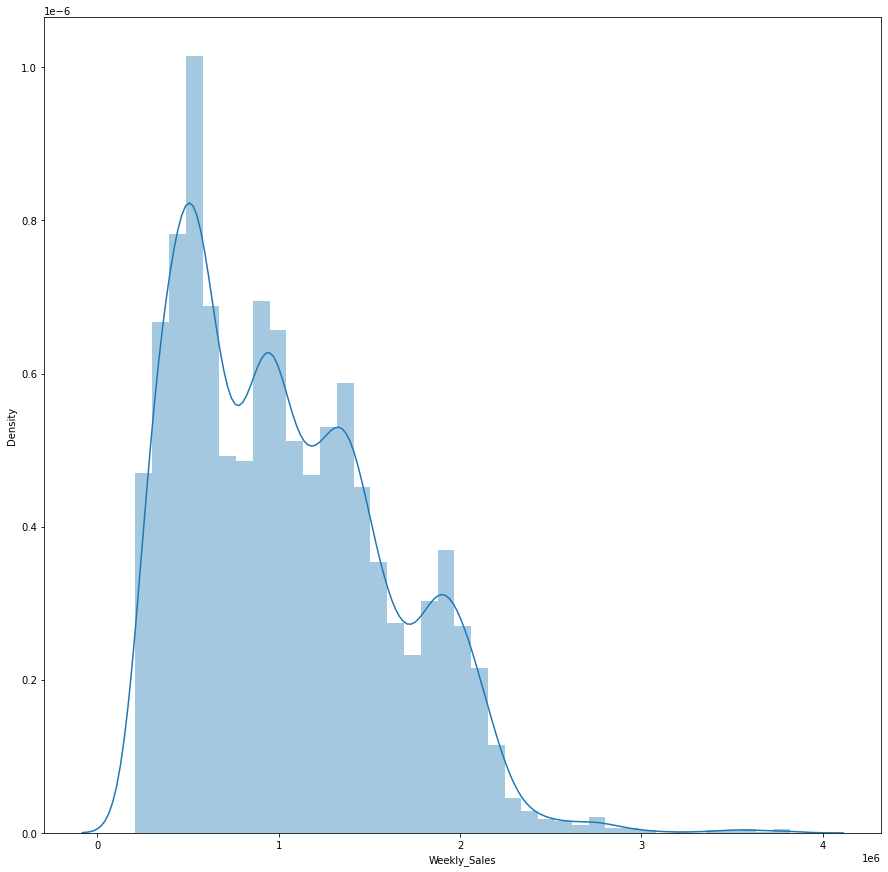

In [13]:
# Weekly_Sales için normalliğin incelenmesi.
plt.figure(figsize=(15,15))
sns.distplot(veri["Weekly_Sales"])

# Grafik incelendiğinde haftalık satışlar için bir sağa çarpıklık söz konusu
# Bu çalışmada yapay sinir ağı ile regresyon uygulanacağı için normallik üzerinde çok fazla durulmadı
# Normal bir regresyonda başarılı bir model elde etmek için çan eğrisi görünümünün grafikten elde edilmesi gerekiyor.

In [14]:
veri.describe()
# Verilerin standart sapmaları incelendiğinde her bir değişkenin birimi değiştiği için kendi içerisinde belirli sapmalar gösterdiği görülüyor.
# Örneğin Temperature değişkeni santigrat birimine göre, Fuel_Price ise para birimine göre bir sapma gösteriyor.
# Burada Weekly_Sales için tahmin işlemi uygulayacağız, bundan dolayı Weekly_Sales için std'yi yorumlayacak olursak:
# Weekly_Sales için min ve max değerleri incelendiğinde std sapmanın yüksek olduğu görülüyor. Bu durum outlier değerlerden kaynaklanıyor olabilir.

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.475524,3.573427
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.321797,1.426581
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,0.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,4.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,4.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,4.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,6.000000


C:\Users\User\anaconda3\envs\directml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

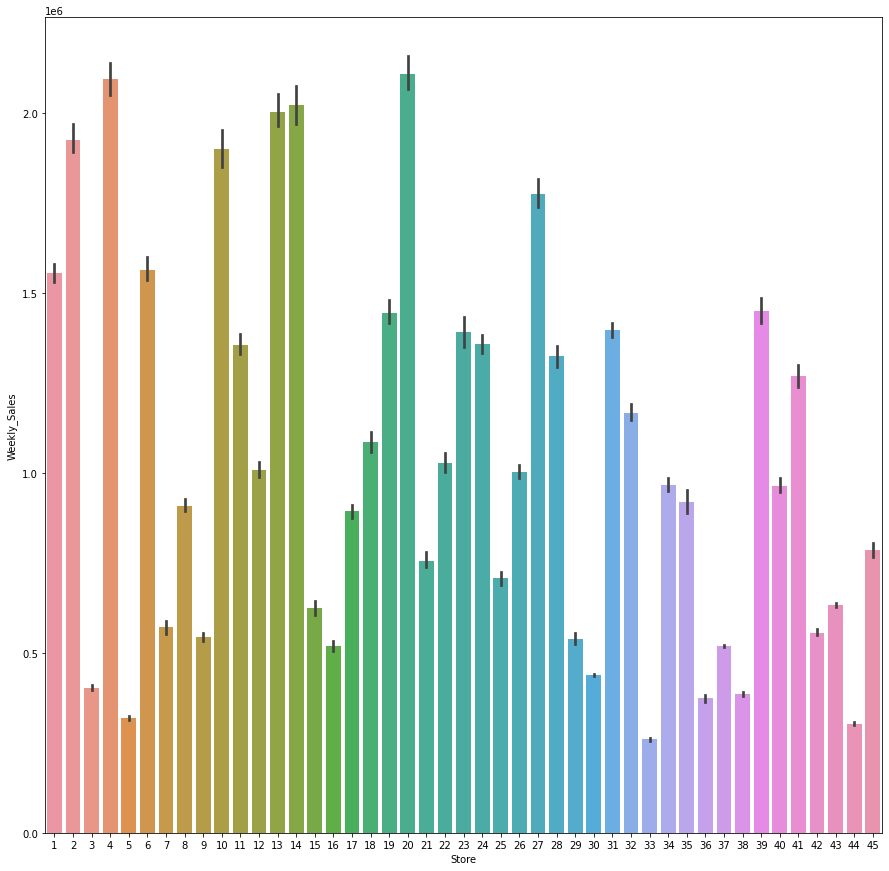

In [15]:
plt.figure(figsize=(15,15))
sns.barplot(veri["Store"], veri["Weekly_Sales"])

# Aşağıdaki barplot incelendiğinde toplamda en çok satış yapan market numaralarının 4. ve 20. marketler olduğu görülüyor.

In [16]:
#  4. ve 20. marketin toplam satış değerlerini incelersek:
veri.groupby("Store").sum()["Weekly_Sales"].iloc[[3,19]]

Store
4     2.995440e+08
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

In [17]:
# Veri seti için korelasyon matrisini incelersek:
veri.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
Store,1.000000e+00,-0.335332,6.250842e-20,-0.022659,0.060023,-0.209492,0.223531,0.000000,3.071631e-19,2.384098e-19
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-0.018378,6.753523e-02,-2.104085e-02
Holiday_Flag,6.250842e-20,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-0.056783,3.322341e-01,-9.100474e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,0.064269,6.643970e-02,1.833136e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,0.779470,-5.283174e-02,-2.651216e-02
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,0.074796,1.478843e-03,-9.595877e-03
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-0.241813,-2.061552e-03,3.777320e-02
Year,0.000000e+00,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,1.000000,-1.390145e-01,-9.923791e-02
Month,3.071631e-19,0.067535,3.322341e-01,0.066440,-0.052832,0.001479,-0.002062,-0.139014,1.000000e+00,-1.387259e-01
Week,2.384098e-19,-0.021041,-9.100474e-02,0.018331,-0.026512,-0.009596,0.037773,-0.099238,-1.387259e-01,1.000000e+00


<AxesSubplot:>

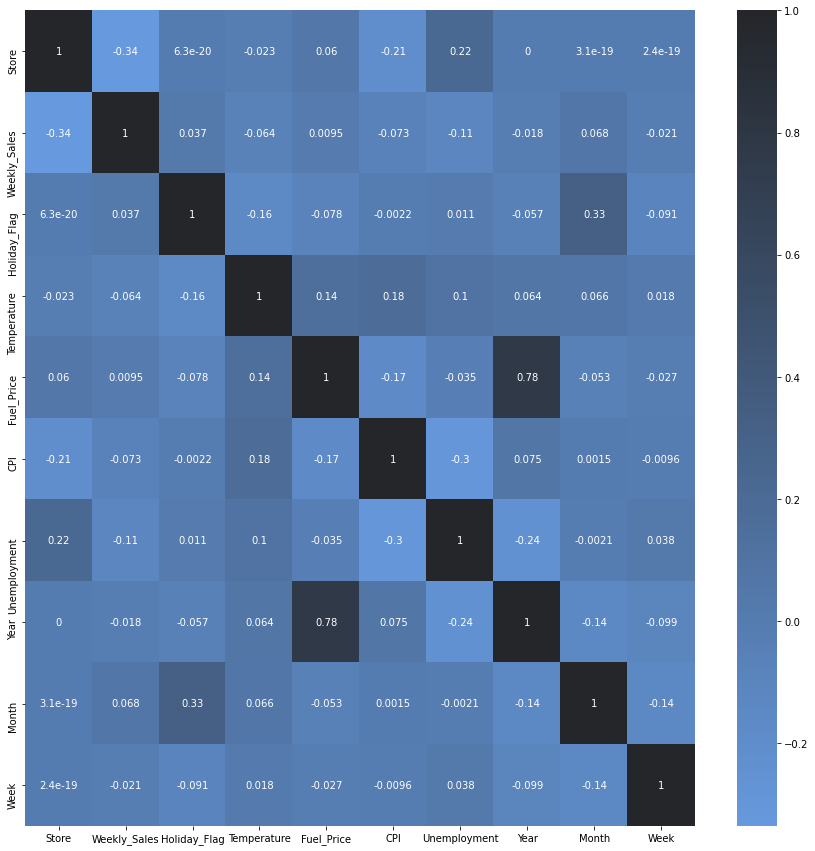

In [19]:
# Korelasyon matrisini daha net görebilmek için görselleştirirsek:
plt.figure(figsize=(15,15))
cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.heatmap(veri.corr(), cmap=cmap, annot=True)


# Korelasyon matrisini genel olarak yorumlayacak olursak:
# Değişkenler arasında çok güçlü bir negatif veya pozitif bağ söz konusu değil.
# Sadece Fuel_Price ve Year değişkenleri arasında 0.78'lik bir güçlü pozitif korelasyon mevcut.
# Ardından bütün matris içerisinde ikinci en yüksek etkileşimin 0.18 ile Temperature ve CPI arasında pozitif yönlü olduğu görülüyor.

In [20]:
# Weekly_Sales için korelasyon değerlerini incelersek:
veri.corr()["Weekly_Sales"].sort_values()

# Weekly_Sales değişkeni Store değişkeni ile negatif yönde yüksek ilişkiye sahip görülüyor
# Satılan mağazanın numarası satış sayısına negatif yönde olacak şekilde etkiliyor.
# Ayrıca Weekly_Sales değişkeni Unemployment değişkeni ile de negatif yönde ikinci yüksek etkileşime sahip görünüyor.
# Yani o gün oluşan işşizlik oranı ve satışlar arasında negatif yönde bir ilişki bulunuyor.

Store          -0.335332
Unemployment   -0.106176
CPI            -0.072634
Temperature    -0.063810
Week           -0.021041
Year           -0.018378
Fuel_Price      0.009464
Holiday_Flag    0.036891
Month           0.067535
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64

In [21]:
# OUTLİER VERİ TEMİZLEME:
veri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-05-02 to 2012-10-26
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Year          6435 non-null   int64  
 8   Month         6435 non-null   int64  
 9   Week          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 553.0 KB


In [22]:
# Float ve kategorik değişkenleri outlier belirleyebilmek için atadım.
n_degiskenler=veri.select_dtypes(include=["float"]).columns.values
#k_degiskenler=veri.select_dtypes(include=["category"]).columns.values

In [23]:
n_degiskenler

array(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'],
      dtype=object)

C:\Users\User\anaconda3\envs\directml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\envs\directml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\envs\directml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

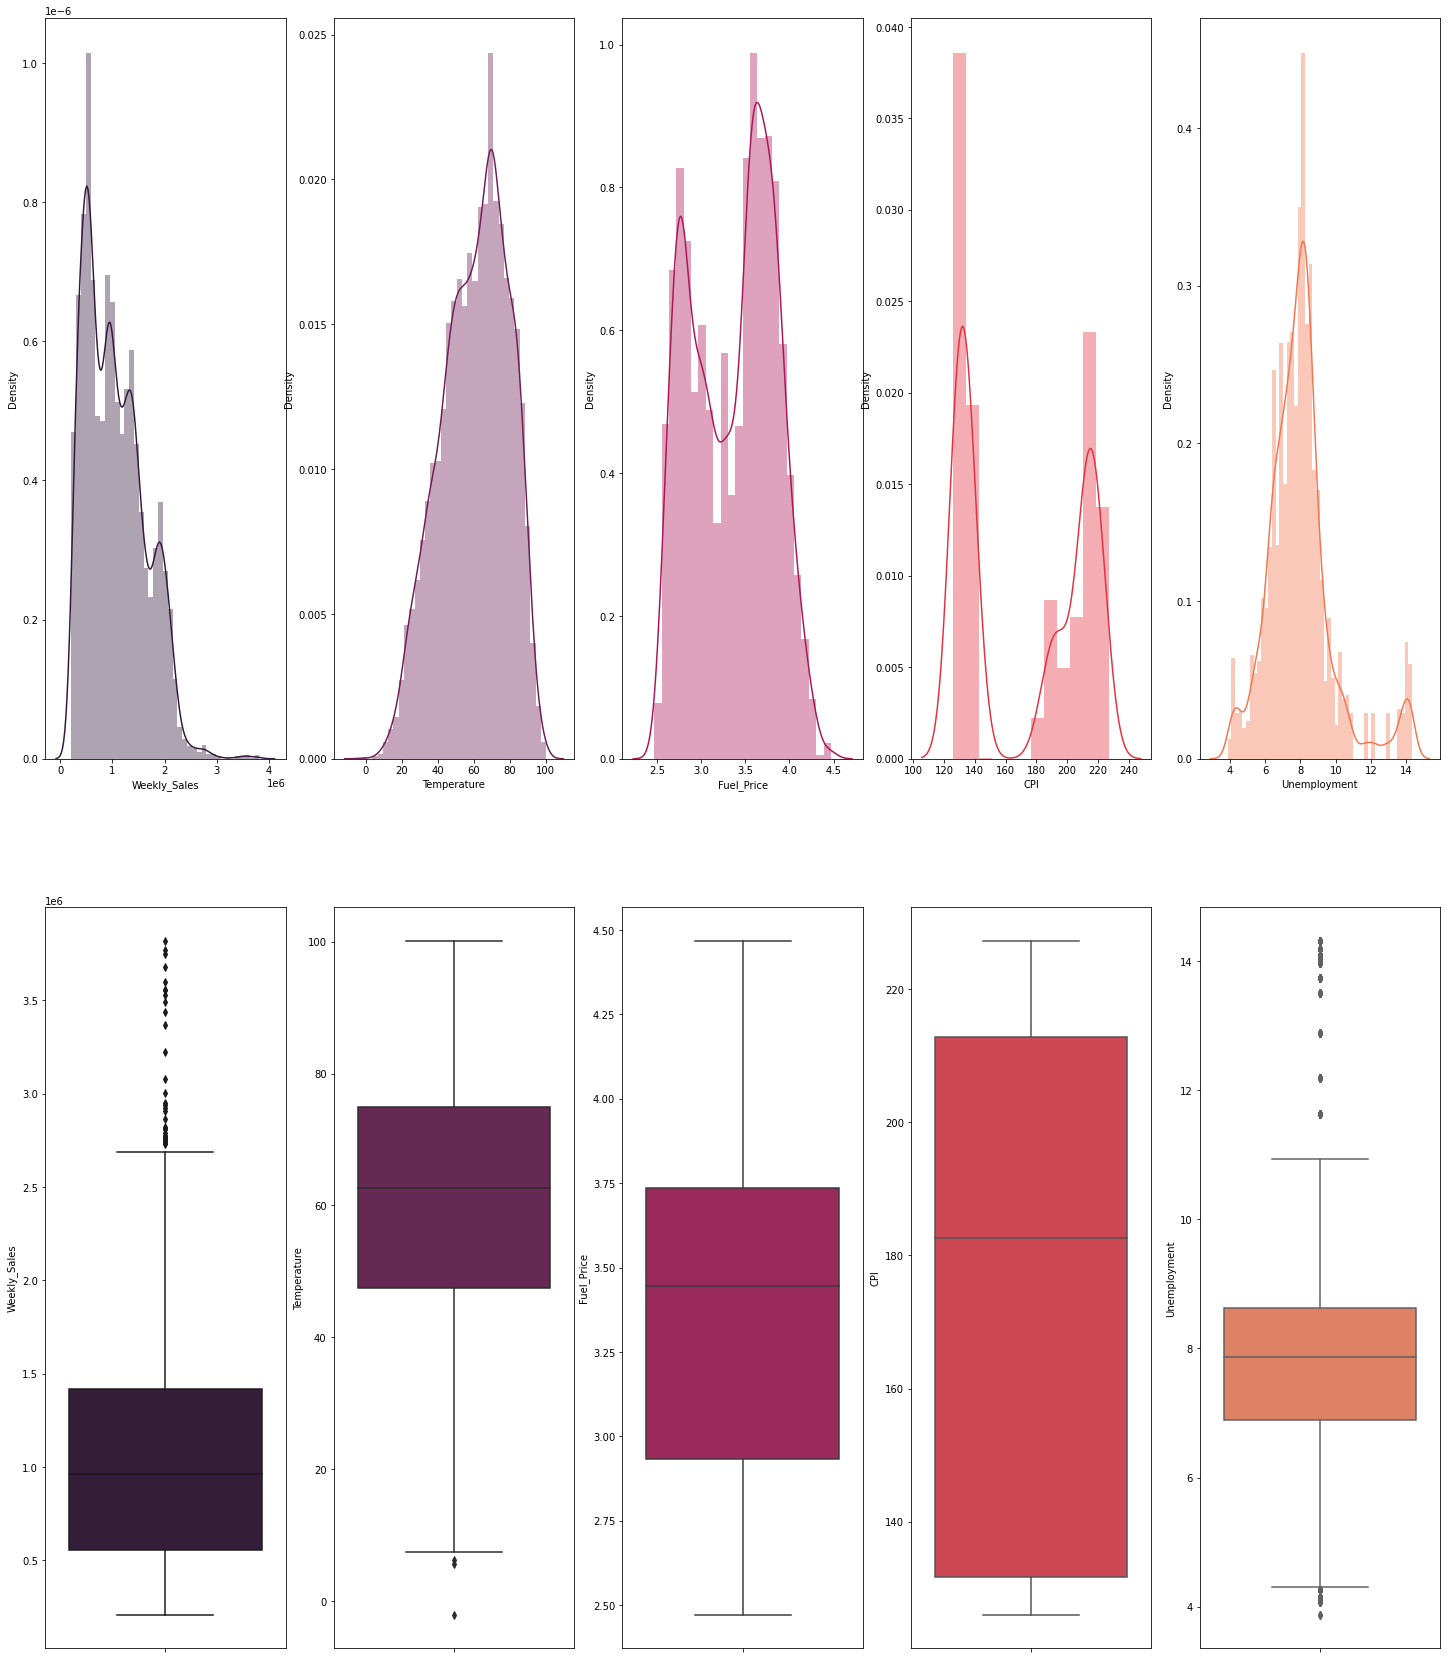

In [24]:
import itertools as itt
fig = plt.figure(figsize=(25,30))


palette = itt.cycle(sns.color_palette("rocket"))
a=1
for x in n_degiskenler:
    plt.subplot(2,5,a)
    sns.distplot(veri[x], color=next(palette))
    a=a+1

palette = itt.cycle(sns.color_palette("rocket"))
for x in n_degiskenler:
    plt.subplot(2,5,a)
    sns.boxplot(y=veri[x], data=veri ,orient="v", color=next(palette))
    a=a+1

plt.show()



# Grafikler incelendiğinde:
# Özellikle Weekly_Sales'da outlier değerler boxplot'ta görünüyor
# Ayrıca Unemployment'da da outlier değerler bulunuyor.
# Bunun dışında Temperature'da, q1-1.5*iqr için outlier değerler görünüyor.

In [25]:
# İnter Quantile Metodu ile outlierlar belirlenerek veri setinden çıkarılırsa:
veri_outlier=veri.copy()
for i in n_degiskenler:
    Q1 = veri_outlier[i].quantile(0.25)
    Q3 = veri_outlier[i].quantile(0.75)
    IQR = Q3 - Q1
    veri_outlier = veri_outlier[veri_outlier[i] <= (Q3+(1.5*IQR))]
    veri_outlier = veri_outlier[veri_outlier[i] >= (Q1-(1.5*IQR))]
    veri_outlier = veri_outlier.reset_index(drop=True)


In [26]:
print(f" Toplamda {len(veri)-len(veri_outlier)} gözlem veri setinden temizlendi.")

 Toplamda 518 gözlem veri setinden temizlendi.


C:\Users\User\anaconda3\envs\directml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\envs\directml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\envs\directml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

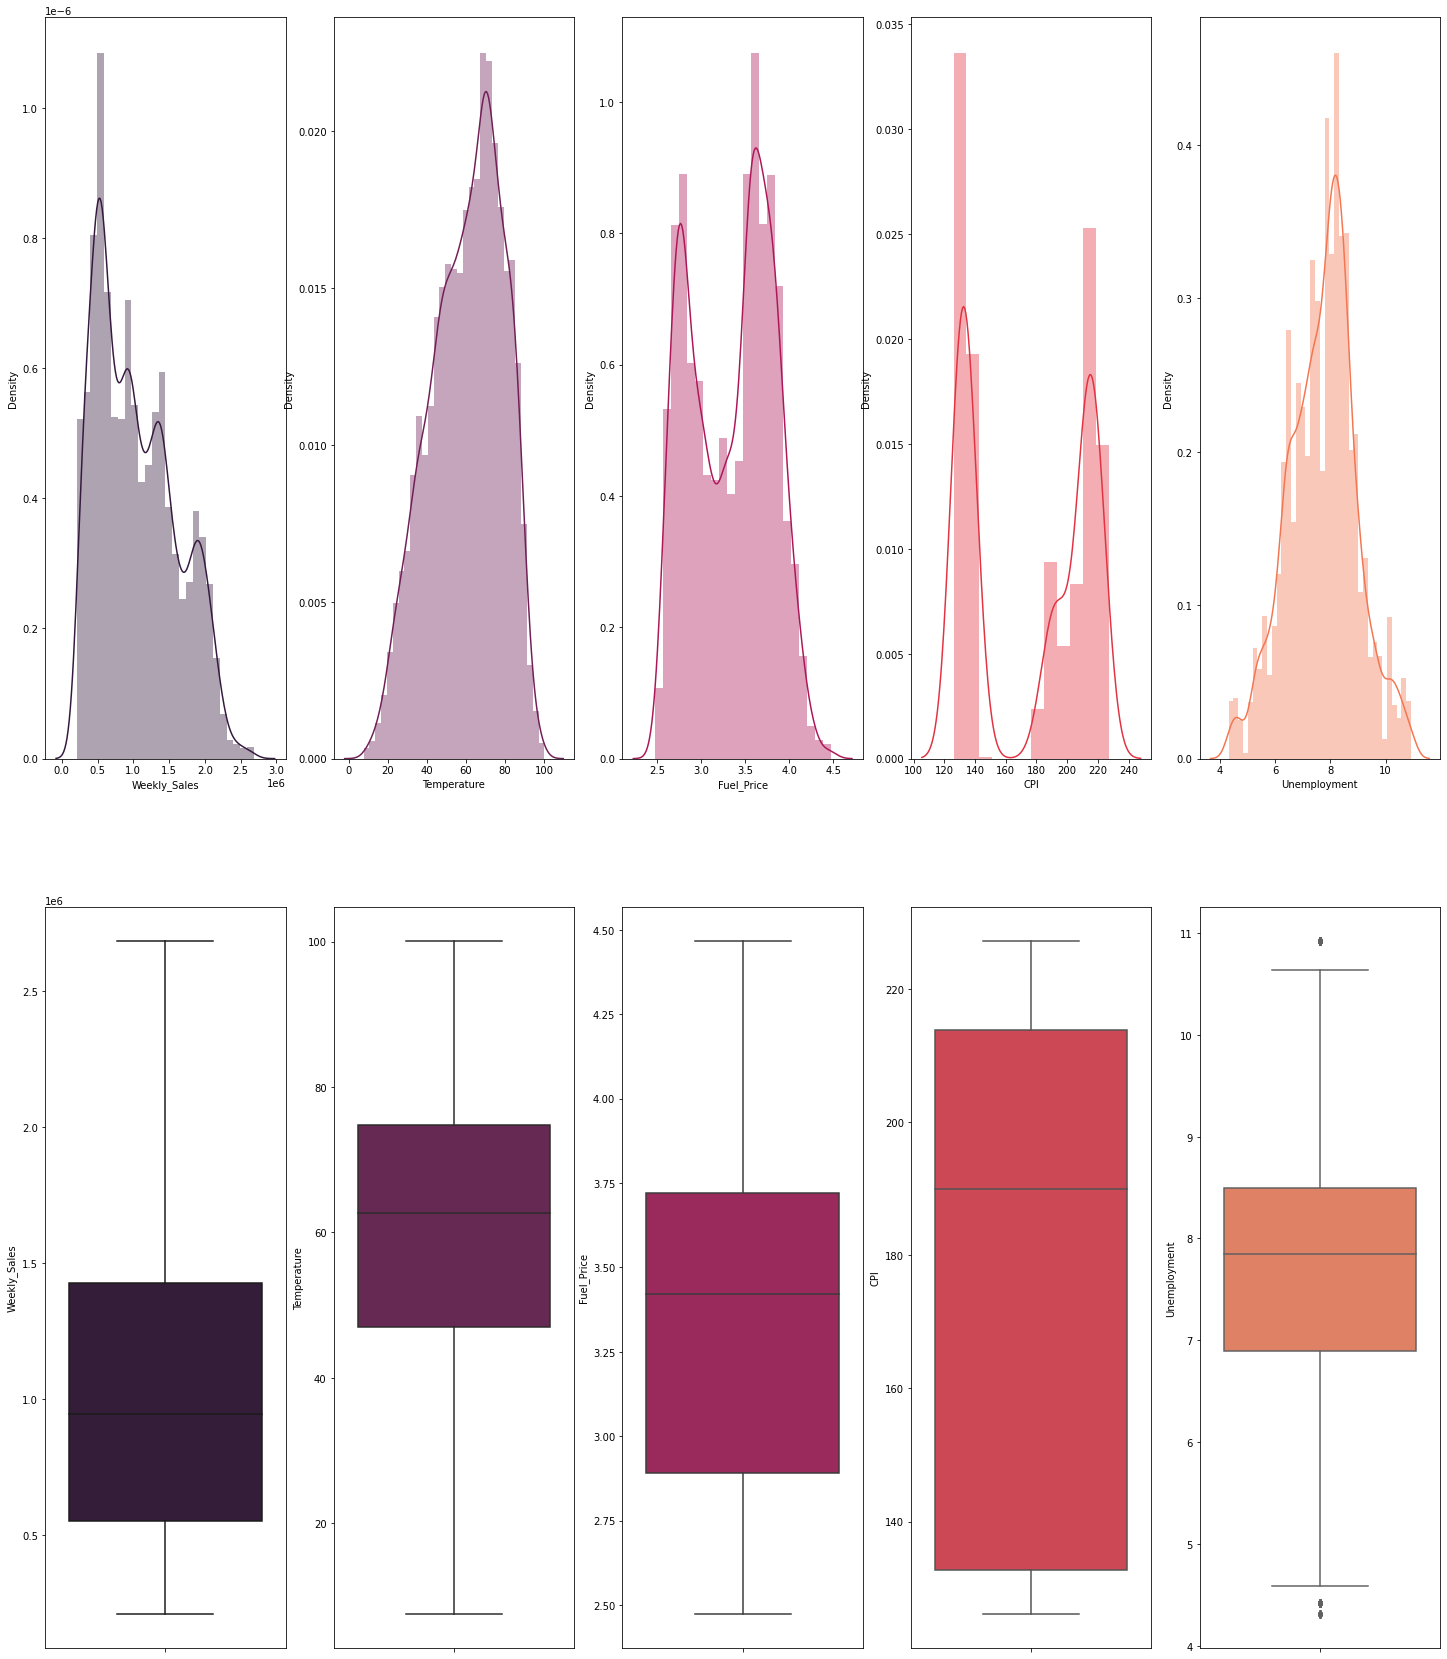

In [27]:
# Tekrardan grafikleri incelersek, buradan da outlier gözlemlerin silindiği görülüyor
# Özellikle daha düzgün boxplot'lar elde edildi.
fig = plt.figure(figsize=(25,30))


palette = itt.cycle(sns.color_palette("rocket"))
a=1
for x in n_degiskenler:
    plt.subplot(2,5,a)
    sns.distplot(veri_outlier[x], color=next(palette))
    a=a+1

palette = itt.cycle(sns.color_palette("rocket"))
for x in n_degiskenler:
    plt.subplot(2,5,a)
    sns.boxplot(y=veri_outlier[x], data=veri_outlier ,orient="v", color=next(palette))
    a=a+1

plt.show()

In [67]:
# Modelin oluşturulması
# Not: Burada yapay sinir ağı ile regresyon yapılacağı için ilgilenilen veri setinin normalliği açısından çok büyük bir değişiklik yapılmadı.
veri_son_hali=veri_outlier.copy()

In [29]:
# input ve target değişkenlerini atıyoruz:
x=veri_son_hali.drop("Weekly_Sales", axis=1).values
y=veri_son_hali["Weekly_Sales"].values

In [30]:
# input verilerimiz:
x

array([[1.000e+00, 0.000e+00, 4.231e+01, ..., 2.010e+03, 5.000e+00,
        6.000e+00],
       [1.000e+00, 1.000e+00, 3.851e+01, ..., 2.010e+03, 1.200e+01,
        3.000e+00],
       [1.000e+00, 0.000e+00, 3.993e+01, ..., 2.010e+03, 2.000e+00,
        4.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 5.447e+01, ..., 2.012e+03, 1.200e+01,
        0.000e+00],
       [4.500e+01, 0.000e+00, 5.647e+01, ..., 2.012e+03, 1.000e+01,
        4.000e+00],
       [4.500e+01, 0.000e+00, 5.885e+01, ..., 2.012e+03, 1.000e+01,
        4.000e+00]])

In [31]:
# target verilerimiz
y

array([1643690.9 , 1641957.44, 1611968.17, ...,  734464.36,  718125.53,
        760281.43])

In [32]:
# Gözlem sayısını %70 train ve %30 test olacak şekilde bölüyoruz:
from sklearn.model_selection import train_test_split

In [33]:
# Sonradan tekrardan incelersem diye random_state=10 olarak belirledim.
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30,random_state=10)

In [34]:
# x_train ve x_test'i ysa modeli için scale ediyoruz:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [35]:
# scaler'ı x_train ve x_test için fit ediyoruz ve scale işlemini gerçekleştiriyoruz:
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [36]:
# YSA modelini oluşturma
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense


In [37]:
x_train.shape[1]
# 9 tane değişken olduğu için girdi katmanında 9 nöron olacak.

9

In [38]:
Model=Sequential()

# aktivasyon fonksiyonu relu ve sırasıyla 18,9,6 nöron bulunan 3 adet gizli katman ve aktivasyon foknsiyonu linear olan regresyon çıktı katmanı
Model.add(Dense(18, input_dim=x_train.shape[1], activation="relu"))
Model.add(Dense(9, activation="relu"))
Model.add(Dense(6, activation="relu"))
Model.add(Dense(1, activation="linear")) # Regresyon çıktı katmanı

Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_absolute_error")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [39]:
# Model eğitim:
Model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),epochs=5000, batch_size=100)

Train on 4141 samples, validate on 1776 samples
Epoch 1/5000
4141/4141 [==============================] - 1s 236us/sample - loss: 1009001.6258 - val_loss: 863282.9545
Epoch 2/5000
4141/4141 [==============================] - 0s 32us/sample - loss: 546664.1278 - val_loss: 458976.2893
Epoch 3/5000
4141/4141 [==============================] - 0s 35us/sample - loss: 444203.8308 - val_loss: 430168.5989
Epoch 4/5000
4141/4141 [==============================] - 0s 37us/sample - loss: 429838.6006 - val_loss: 416533.1703
Epoch 5/5000
4141/4141 [==============================] - 0s 35us/sample - loss: 418799.8168 - val_loss: 409648.2407
Epoch 6/5000
4141/4141 [==============================] - 0s 35us/sample - loss: 411792.3830 - val_loss: 402360.5420
Epoch 7/5000
4141/4141 [==============================] - 0s 34us/sample - loss: 404517.7493 - val_loss: 399040.6396
Epoch 8/5000
4141/4141 [==============================] - 0s 35us/sample - loss: 401182.6744 - val_loss: 400462.1287
Epoch 9/5000
4

In [51]:
lossDegerleri=pd.DataFrame(Model.history.history)
lossDegerleri

,loss,val_loss
0,1.009002e+06,863282.954533
1,5.466641e+05,458976.289274
2,4.442038e+05,430168.598888
3,4.298386e+05,416533.170327
4,4.187998e+05,409648.240709
...,...,...
4995,1.456276e+05,147799.412936
4996,1.408922e+05,153596.020006
4997,1.405910e+05,155369.934157
4998,1.415431e+05,149785.242170


<AxesSubplot:>

<Figure size 1080x1080 with 0 Axes>

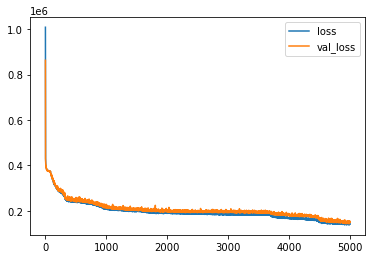

In [52]:
plt.figure(figsize=(15,15))
lossDegerleri.plot()

# Düşük epoch sayısında loss ve val_loss değerleri arasında net bir birleşim gerçekleşmedi. Bundan dolayı epoch sayısını 5000 ve batch_size=100 olarak belirledim
# Ve en iyi metrikleri bu parametreler ile elde ettim.


In [42]:
# MAE, MSE ve R^2 değerlerini incelersek:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
# Test verileri ile tahmin yaparsak:
tahmin=Model.predict(x_test)

In [54]:
tahmin

array([[1055087.8 ],
       [1216467.2 ],
       [2150228.  ],
       ...,
       [ 509290.75],
       [ 363884.97],
       [ 556260.75]], dtype=float32)

In [61]:
veri.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.475524,3.573427
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.321797,1.426581
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,0.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,4.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,4.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,4.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,6.000000


In [55]:
# MAE değeri:
mean_absolute_error(y_test, tahmin)

## MAE değeri incelendiğinde ortalama satış değerinden(1046965), 149212'lık bir satış değeri sapması elde ediyoruz.

149212.63743454393

In [56]:
#MSE değeri
mean_squared_error(y_test, tahmin)

56741103694.85703

In [57]:
# R^2 değeri:
r2_score(y_test, tahmin)

# Yaklaşık %81'lik bir R^2 performansı elde ettik.

0.8113419706387237

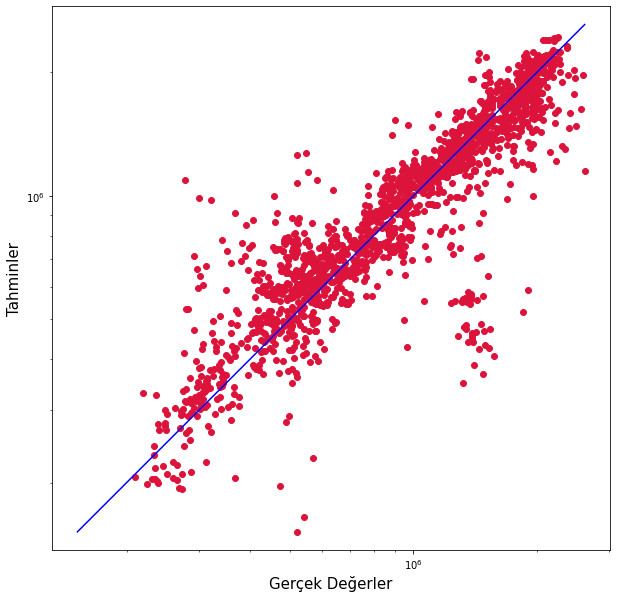

In [63]:
# Bu sapmayı grafik üzerinde inceleyecek olursak:

plt.figure(figsize=(10,10))
plt.scatter(y_test, tahmin, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(tahmin), max(y_test))
p2 = min(min(tahmin), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.axis('equal')
plt.show()

# Regresyon çizgisinden bazı büyük sapmalar görülüyor. Bu durum ağ parametreleri düzeltilerek daha da düzeltilebilir.

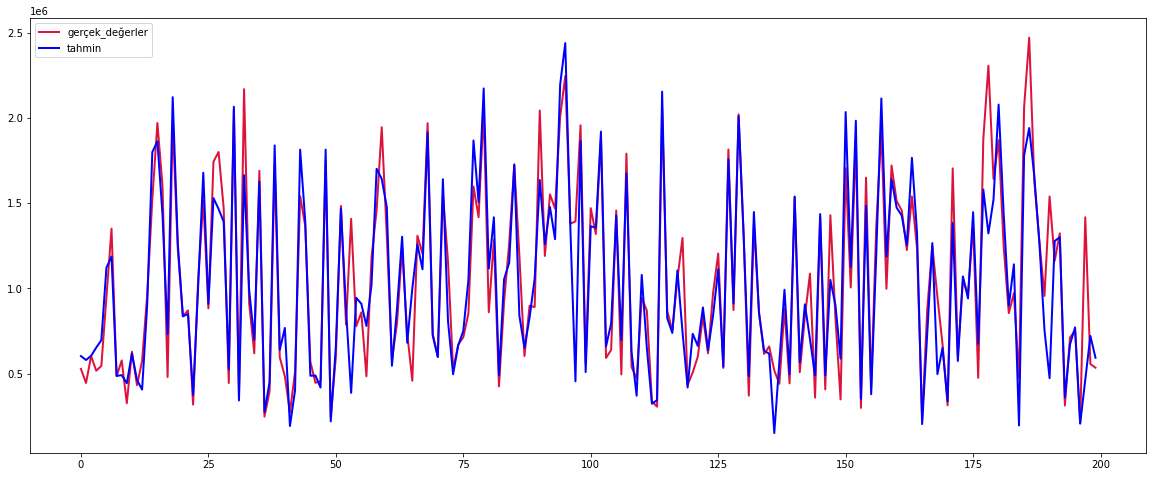

In [60]:
# Örnek olarak 1000'den 1200. gözleme kadar gerçek ve tahmini Weekly_Sales değerleri
plt.figure(figsize=(20,8))
plt.plot(y_test[1000:1200], label="gerçek_değerler", linewidth=2.0,color='crimson')
plt.plot(tahmin[1000:1200], label="tahmin", linewidth=2.0,color='blue')
plt.legend(loc="best")